# Tutorial: Detection of Aircraft Loss of Separation 
Dataset provided: Simulated flown tracks of 20 aircraft, including full data and simplified data.  
* Full data: locations of all aircraft at every seconds from t0=0 to tmax = 480 seconds.  
* Simplified data: only locations at t0=0 and locations at tmax=480 are provided. 

### Task: Determine the aircraft pair that involves in a loss of separation.  
### Output to find: callsigns of the two aircraft involved in the conflict, lateral and vertical distances at closest point of approach, and time at closest point of approach.

# Using full tracks data
Record of 20 aircraft locations at every seconds (from 0 to 480).  

Approach:
* Calculate distance between every 2 aircraft at every seconds, and compare those distances with minima separation.  
* A loss of separation is declared once the lateral distance drops below 5 nautical miles and vertical distance drops below 1000 feet. 
* Given latitudes, longitudes of the 2 aircraft, lateral distance between 2 aircraft can be calculated using Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula)
* Vertical distance between any two aircraft can be found by the difference between their heights.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Functions to plot all tracks

def plot_tracks(tracks, callsigns):
    plt.figure(figsize=(15,10))
    for cs in callsigns:
        track = tracks[tracks.CallSign==cs]
        plt.plot(track.Longitude, track.Latitude)
        plt.scatter(track.Longitude.values[0], track.Latitude.values[0])
        plt.axis('equal')

In [3]:
# import all tracks
ftracks = pd.read_csv("data/tut/tutorial_full_tracks.csv")
ftracks

,CallSign,ExerciseTime,Latitude,Longitude,Height
0,SIA865,0,2.5000,102.1874,10668.0
1,SIA367,0,2.5710,102.1110,11887.2
2,SIA489,0,2.3334,102.0135,11887.2
3,SIA992,0,2.1424,102.2936,11887.2
4,SIA311,0,2.1998,102.5925,11887.2
...,...,...,...,...,...
9615,SIA311,480,2.2517,102.0986,11887.2
9616,SIA992,480,2.4342,101.8917,11887.2
9617,SIA489,480,2.6782,102.3709,11887.2
9618,SIA524,480,2.5610,102.1644,10668.0


In [4]:
# list of unique callsigns
callsigns = ftracks.CallSign.unique()
len(callsigns) # should be 20 A/C

20

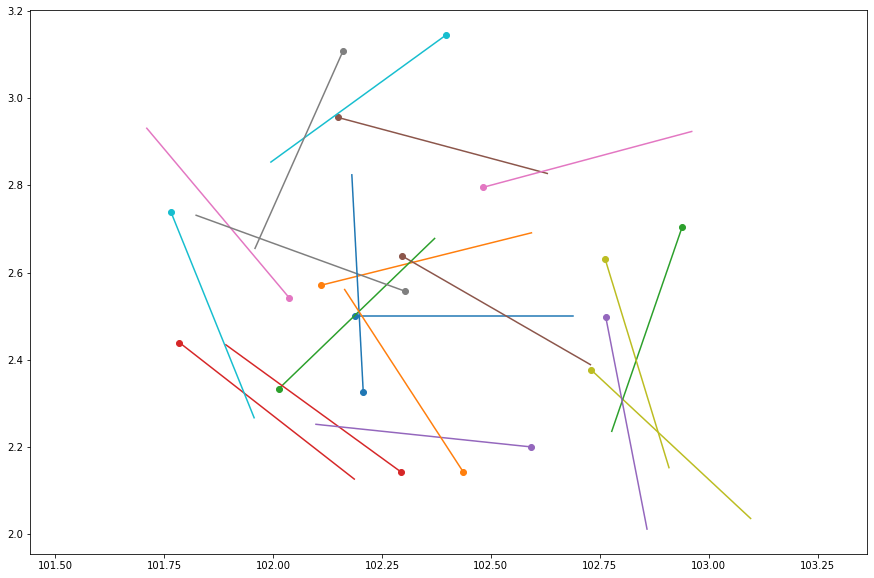

In [5]:
# Plot aircraft tracks. Dots are initial locations of the aircraft
plot_tracks(ftracks, callsigns)

# Using simple tracks
Only locations of t0=0 and tmax=480 second.  
Approach: approximate great circle distance by Euclidean distance in ECEF coordinates, then apply simple Closest Point of Approach formula
<img align="left" src="./img/cpa1.png" width="50%">
<img align="left" style="padding-top:60px" src="./img/cpa2.png" width="50%">  



### Important: CPA formula doesn't work using lat, lon coordinates. Aircraft coordinates should be converted to Cartesian frame beforehand. (ECEF coordinares is a good way to do)

ECEF conversion in spherical Earth model:  

$x = (R_e + height) * \text{cos}(lat) * \text{cos}(lon)$  
$y = (R_e + height) * \text{cos}(lat) * \text{sin}(lon)$  
$z = (R_e + height) * \text{sin}(lat)$  

$R_e = 6371008.77141$: approximated spherical Earth radius in meters

In [6]:
stracks = pd.read_csv("data/tut/tutorial_simple_tracks.csv")
stracks

,CallSign,ExerciseTime,Latitude,Longitude,Height
0,SIA865,0,2.5000,102.1874,10668.0
1,SIA367,0,2.5710,102.1110,11887.2
2,SIA489,0,2.3334,102.0135,11887.2
3,SIA992,0,2.1424,102.2936,11887.2
4,SIA311,0,2.1998,102.5925,11887.2
5,SIA395,0,2.6384,102.2953,10668.0
6,SIA850,0,2.5416,102.0376,9448.8
7,SIA803,0,2.5575,102.3020,9448.8
8,SIA598,0,2.3763,102.7304,10668.0
9,SIA941,0,3.1453,102.3973,11887.2
